In [4]:
import networkx as nx
import matplotlib.pyplot as plt

Вот пример гарфа

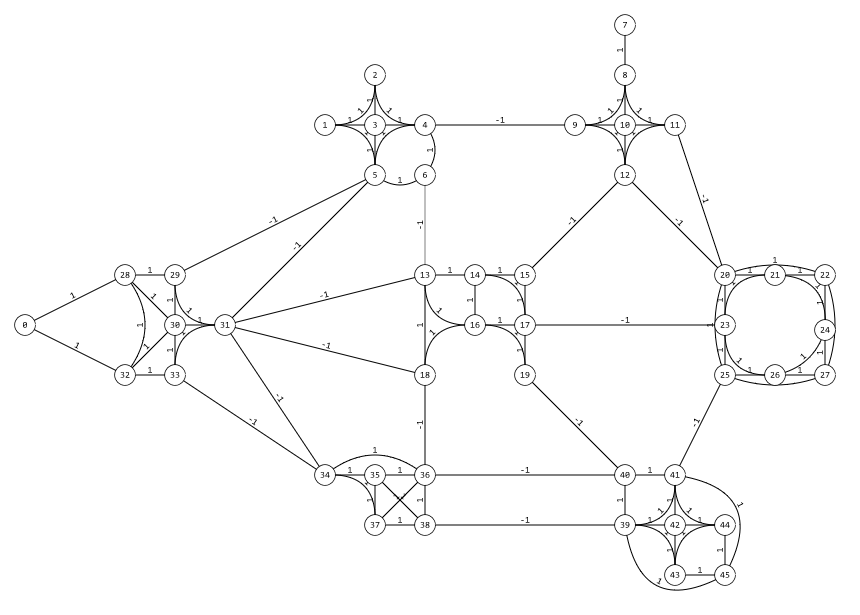

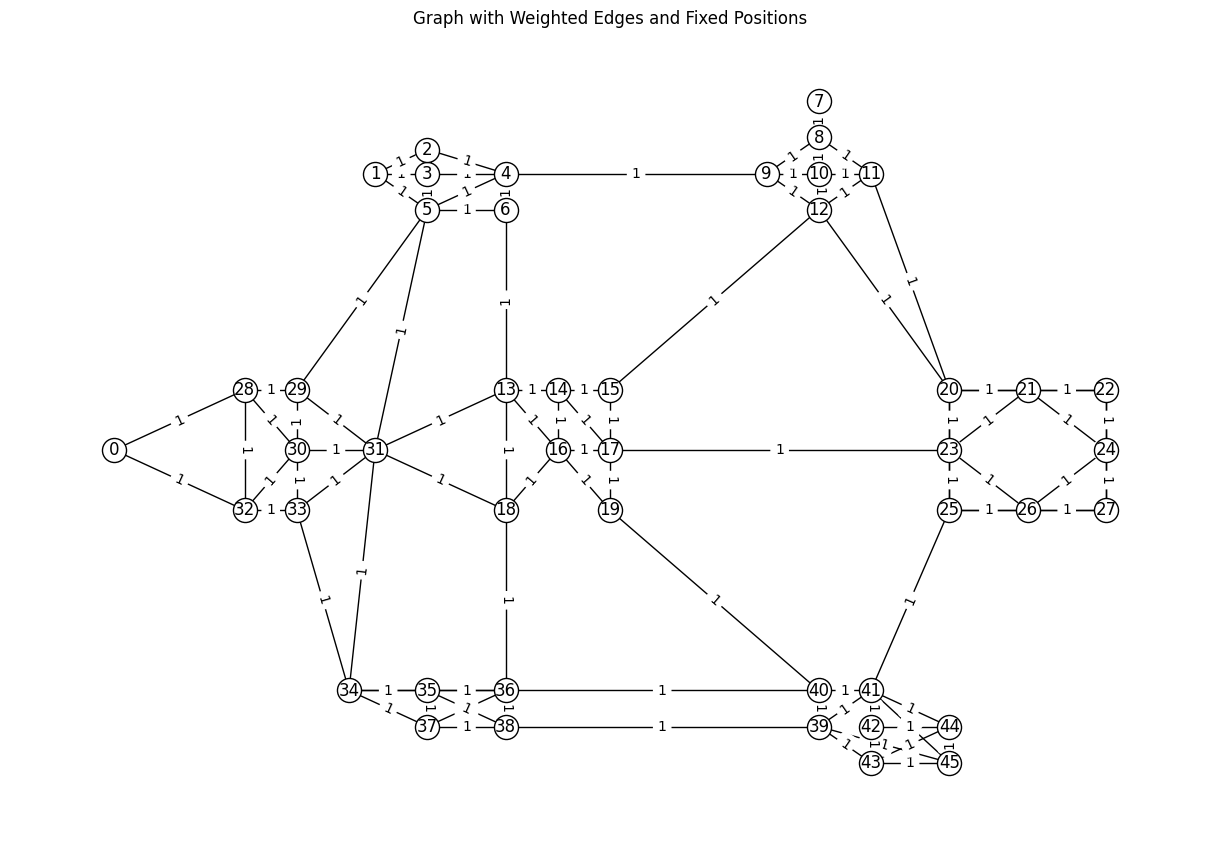

In [5]:
G = nx.Graph()

edges = [
    (0,28),(0,32),(28,32),(28,30),(32,30),(28,29),(32,33),(33,30),(30,29),(30,31),(29,31),(33,31),(29,5),(31,5),(31,13),(31,18),(31,34),(33,34),
         (5,6),(5,3),(5,1),(5,4),(1,3),(1,2),(2,3),(2,4),(4,3),(4,6),(6,13),(4,9),
         (9,10),(9,8),(9,12),(7,8),(10,8),(10,11),(10,12),(8,11),(11,12),(11,20),(12,20),(12,15),
         (20,21),(20,22),(20,23),(20,25),(21,22),(21,24),(21,23),(22,24),(22,27),(24,27),(24,26),(27,26),(27,25),(26,23),(26,25),(25,23),(25,41),(23,17),
         (13,14),(13,16),(13,18),(14,16),(14,15),(14,17),(15,17),(17,16),(17,19),(19,40),(19,16),(16,18),(18,36),
         (34,35),(34,36),(34,37),(35,36),(35,37),(35,38),(36,38),(36,37),(36,40),(38,37),(38,39),
         (40,41),(40,39),(41,45),(41,44),(41,39),(41,42),(39,45),(39,43),(42,44),(42,43),(43,45),(45,44),(44,43)

]
pos_fixed = {
    0: (0, 0), 28: (0.5, 0.5), 32: (0.5, -0.5), 30: (0.7, 0), 29: (0.7, 0.5), 33: (0.7, -0.5), 31:(1,0),
    5: (1.2, 2), 6: (1.5, 2), 3: (1.2, 2.3), 1: (1, 2.3), 4: (1.5, 2.3), 2: (1.2, 2.5),
    9: (2.5, 2.3), 7: (2.7, 2.9), 8: (2.7, 2.6), 10: (2.7, 2.3), 11: (2.9,  2.3), 12: (2.7, 2), 13: (1.5,0.5),
    14: (1.7, 0.5), 15: (1.9, 0.5), 16: (1.7, 0), 17: (1.9, 0), 18: (1.5, -0.5), 19: (1.9, -0.5),
    20: (3.2, 0.5), 21: (3.5, 0.5), 22: (3.8, 0.5), 23: (3.2, 0), 24: (3.8, 0), 25: (3.2, -0.5),
    26: (3.5, -0.5), 27: (3.8, -0.5), 34: (0.9, -2), 35: (1.2, -2), 36: (1.5, -2), 37: (1.2, -2.3),
    38: (1.5, -2.3), 39: (2.7, -2.3), 40: (2.7, -2), 41: (2.9, -2), 42: (2.9, -2.3), 43: (2.9, -2.6),
    44: (3.2, -2.3), 45: (3.2, -2.6)}

weights = [
    1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
    1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
    1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
    1,1, 1, 1, 1, 1, 1, 1,1, 1, 1, 1, 1, 1, 1, 1,
    1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
    1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1
]


for edge, weight in zip(edges, weights):
    G.add_edge(edge[0], edge[1], weight=weight)



plt.figure(figsize=(12, 8))
nx.draw(G, pos=pos_fixed, with_labels=True, node_color="white", edgecolors="black")
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos=pos_fixed, edge_labels=edge_labels)
plt.title("Graph with Weighted Edges and Fixed Positions")
plt.show()


In [ ]:
#Проосто пример кода

In [8]:
def distribute_drones(graph, num_drones):
    routes = [[] for _ in range(num_drones)]
    visited = set()

    for drone_id in range(num_drones):
        routes[drone_id].append(0)
    visited.add(0)


    current_positions = [0] * num_drones


    while len(visited) < len(graph.nodes):
        for drone_id in range(num_drones):
            if len(visited) == len(graph.nodes):
                break


            min_cost = float('inf')
            next_node = -1

            for node in graph.nodes:
                if node not in visited:
                    cost = nx.shortest_path_length(graph, source=current_positions[drone_id], target=node, weight='weight')
                    if cost < min_cost:
                        min_cost = cost
                        next_node = node

            if next_node != -1:
                routes[drone_id].append(next_node)
                visited.add(next_node)
                current_positions[drone_id] = next_node

    return routes


num_drones = 20
routes = distribute_drones(G, num_drones)


for drone_id, route in enumerate(routes):
    print(f"Дрон {drone_id + 1}: {route}")

Дрон 1: [0, 28, 16, 26]
Дрон 2: [0, 32, 40, 44]
Дрон 3: [0, 30, 15, 24]
Дрон 4: [0, 29, 10, 27]
Дрон 5: [0, 33, 38, 42]
Дрон 6: [0, 31, 17]
Дрон 7: [0, 5, 8]
Дрон 8: [0, 34, 41]
Дрон 9: [0, 13, 19]
Дрон 10: [0, 18, 23]
Дрон 11: [0, 6, 12]
Дрон 12: [0, 3, 7]
Дрон 13: [0, 1, 11]
Дрон 14: [0, 4, 20]
Дрон 15: [0, 36, 39]
Дрон 16: [0, 35, 45]
Дрон 17: [0, 37, 43]
Дрон 18: [0, 2, 21]
Дрон 19: [0, 9, 22]
Дрон 20: [0, 14, 25]
